In [41]:
# Comparision

In [42]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#set_config(display="diagram")

df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Capstone-1\May\Data\AfterEDA.csv')
df.head(5)

# df.shape

,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
# Convert date sold to just year_sold
df['year_sold'] = pd.to_datetime(df['date_sold']).dt.year.astype(int)
df = df.drop(columns=['date_sold'], axis =1)


In [44]:
# Define features and target
X = df.drop(columns=['price'], axis =1)
y = df['price']


In [45]:
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

X_ready = pipeline.fit_transform(X)

# Define models
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}


In [46]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate models
evaluation = []

for model_name, reg in regressors.items():
    r2 = cross_val_score(reg, X_ready, y, cv=kfold, scoring='r2')
    rmse = np.sqrt(-cross_val_score(reg, X_ready, y, cv=kfold, scoring='neg_mean_squared_error'))

    evaluation.append({
        'Model': model_name,
        'Avg R2': round(r2.mean(), 5),
        'R2 Std Dev': round(r2.std(), 5),
        'Avg RMSE': round(rmse.mean(), 2),
        'RMSE Std Dev': round(rmse.std(), 2)
    })

# results
results_table = pd.DataFrame(evaluation)
print(results_table)

               Model   Avg R2  R2 Std Dev   Avg RMSE  RMSE Std Dev
0  Linear Regression  0.70043     0.01772  200485.73      17674.75
1   Ridge Regression  0.70062     0.01757  200420.14      17611.53
2      Decision Tree  0.74020     0.04622  185942.75      21173.32
3      Random Forest  0.87960     0.01792  126705.20      13216.80
4            XGBoost  0.88752     0.01126  122888.77      13415.13


In [47]:
# Best Model: XGBoost

# Highest R2: 0.88752 - explains the most variance in the target variable.
# Lowest RMSE: 122,888.77 - lowest average prediction error.
# Lowest Std Dev: Indicates stable performance across folds.
    
# Runner-Up: Random Forest
# Very close in performance to XGBoost, but slightly lower R² and higher RMSE.
    
# Summary:
# XGBoost is the best overall model in this comparison.
# It's both accurate and consistent, making it a strong choice for predicting house prices.


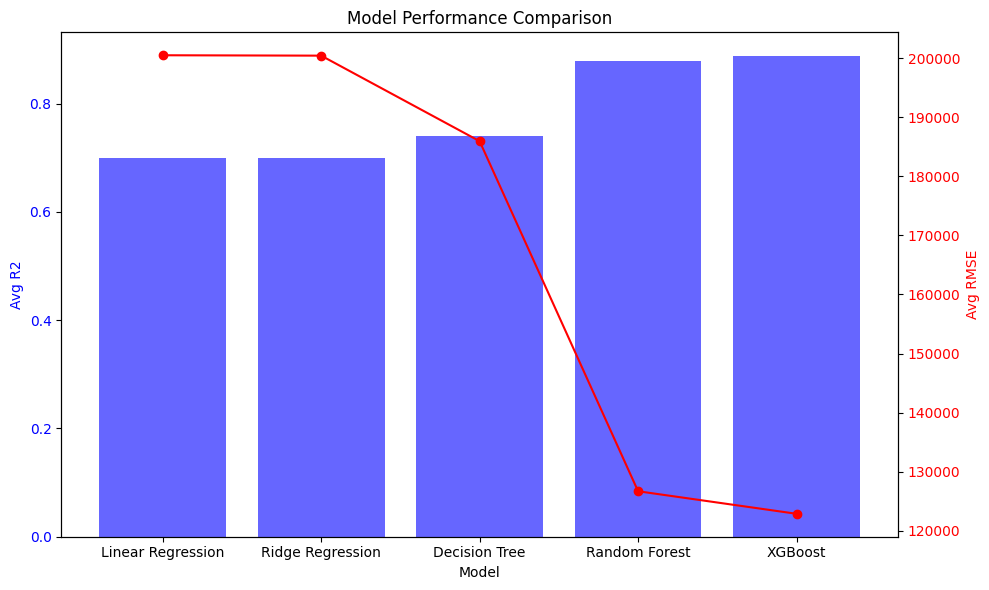

In [48]:
# Provided evaluation metrics

import matplotlib.pyplot as plt

data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Avg R2': [0.70043, 0.70062, 0.74020, 0.87960, 0.88752],
    'Avg RMSE': [200485.73, 200420.14, 185942.75, 126705.20, 122888.77]
}
# Create DataFrame
df_compare = pd.DataFrame(data)
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bar chart for Avg R2
ax1.bar(df_compare['Model'], df_compare['Avg R2'], color='b', alpha=0.6)
ax1.set_xlabel('Model')
ax1.set_ylabel('Avg R2', color='b')
ax1.tick_params(axis='y', labelcolor='b')
# Line plot for Avg RMSE
ax2 = ax1.twinx()
ax2.plot(df_compare['Model'], df_compare['Avg RMSE'], color='r', marker='o')
ax2.set_ylabel('Avg RMSE', color='r')
ax2.tick_params(axis='y', labelcolor='r')
# Title and layout
plt.title('Model Performance Comparison')
fig.tight_layout()
plt.show()


In [49]:
How to Read the Chart:
Blue bars represent the average R2 (higher is better).
Red line with dots shows the average RMSE (lower is better).
XGBoost stands out with the highest R2 and lowest RMSE, confirming it's the top performer.

SyntaxError: unterminated string literal (detected at line 4) (223766068.py, line 4)